<a href="https://colab.research.google.com/github/Anh-Quan-07/-n-T-p-Python/blob/main/File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bài 1: Hãy trình bày cách đọc 1 tập dữ liệu vào bộ nhớ (ví dụ: Iris). Yêu cầu giải thích bằng lời và
triển khai bằng code sau đó.

Mỗi loại có 50 bông hoa được đo với dữ liệu là 4 thông tin: chiều dài, chiều rộng đài hoa (sepal), và chiều dài, chiều rộng cánh hoa (petal).

Iris flower dataset có sẵn trong thư viện scikit-learn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
df = pd.DataFrame(data)

In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df.sample(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
112,6.8,3.0,5.5,2.1,Virginica
14,5.8,4.0,1.2,0.2,Setosa
0,5.1,3.5,1.4,0.2,Setosa
103,6.3,2.9,5.6,1.8,Virginica
69,5.6,2.5,3.9,1.1,Versicolor
147,6.5,3.0,5.2,2.0,Virginica
94,5.6,2.7,4.2,1.3,Versicolor
133,6.3,2.8,5.1,1.5,Virginica
27,5.2,3.5,1.5,0.2,Setosa
45,4.8,3.0,1.4,0.3,Setosa


In [ ]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

Bài 2: Từ tập dữ liệu trong bộ nhớ nêu trên, hãy tiến hành mô tả bằng các thông số thống kê mô tả
và hình vẽ tương ứng.

In [ ]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.shape

(150, 5)

In [ ]:
setosa = df[df.variety=="Setosa"]
versicolor = df[df.variety=="Versicolor"]
virginica = df[df.variety=="Virginica"]

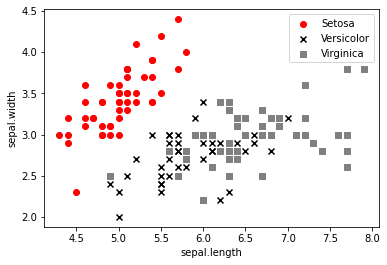

In [ ]:
fig, ax = plt.subplots()
ax.scatter(setosa["sepal.length"], setosa["sepal.width"], label="Setosa", color="red")
ax.scatter(versicolor["sepal.length"], versicolor["sepal.width"], marker="x", label="Versicolor", color="black")
ax.scatter(virginica["sepal.length"], virginica["sepal.width"], marker="s", label="Virginica", color="gray")
ax.set_xlabel("sepal.length")
ax.set_ylabel("sepal.width")
ax.legend()

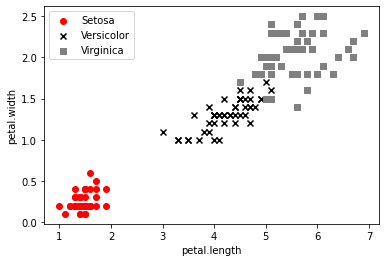

In [ ]:
fig, ax = plt.subplots()
ax.scatter(setosa["petal.length"], setosa["petal.width"], label="Setosa", color="red")
ax.scatter(versicolor["petal.length"], versicolor["petal.width"], marker="x", label="Versicolor", color="black")
ax.scatter(virginica["petal.length"], virginica["petal.width"], marker="s", label="Virginica", color="gray")
ax.set_xlabel("petal.length")
ax.set_ylabel("petal.width")
ax.legend()

Bài 3: Từ tập dữ liệu trong bộ nhớ nêu trên, hãy:
- Trình bày cách xác định dữ liệu và xác định nhãn lớp. Code tương ứng
- Trình bày cách chia tập dữ liệu ban đầu thành tập dữ liệu huấn luyện và tập dữ liệu kiểm
thử. Code tương ứng.

In [ ]:
iris_x = df.values[:, :4]
iris_y = df.values[:, 4]
for i in range (len(iris_y)):
  if iris_y[i] == "Setosa":
    iris_y[i] = 0
  elif iris_y[i] == "Versicolor":
    iris_y[i] = 1
  else:
    iris_y[i] = 2

In [ ]:
dataset = np.concatenate((iris_x.astype(None), iris_y.astype(None).reshape(150, 1)), axis=1)
# np.concatenate((a, b.T), axis=1)

In [ ]:
np.random.shuffle(dataset)
sfdt = np.array_split(dataset, 10)

In [ ]:
train = np.concatenate(sfdt[:9])
test = np.concatenate(sfdt[9:])
x_train = train[:, :4]
y_train = train[:, 4]
x_test = test[:, :4]
y_test = test[:, 4]

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((135, 4), (135,), (15, 4), (15,))

Bài 4: Hãy trình bày lý thuyết về phương pháp 10-fold cross validation và code minh họa

Cross validation là một phương pháp thống kê được sử dụng để ước lượng hiệu quả của các mô hình học máy. Nó thường được sử dụng để so sánh và chọn ra mô hình tốt nhất cho một bài toán. Kỹ thuật này dễ hiểu, dễ thực hiện và cho ra các ước lượng tin cậy hơn so với các phương pháp khác. Trong bài viết này hãy cùng trituenhantao.io tìm hiểu về kỹ thuật cross validation với k-fold.

Cross validation là một kỹ thuật lấy mẫu để đánh giá mô hình học máy trong trường hợp dữ liệu không được dồi dào cho lắm.

Tham số quan trọng trong kỹ thuật này là k, đại diện cho số nhóm mà dữ liệu sẽ được chia ra. Vì lý do đó, nó được mang tên k-fold cross-validation. Khi giá trị của k được lựa chọn, người ta sử dụng trực tiếp giá trị đó trong tên của phương pháp đánh giá. Ví dụ với k=10, phương pháp sẽ mang tên 10-fold cross-validation.

Kỹ thuật này thường bao gồm các bước như sau:

Xáo trộn dataset một cách ngẫu nhiên
Chia dataset thành k nhóm
Với mỗi nhóm:
Sử dụng nhóm hiện tại để đánh giá hiệu quả mô hình
Các nhóm còn lại được sử dụng để huấn luyện mô hình
Huấn luyện mô hình
Đánh giá và sau đó hủy mô hình
Tổng hợp hiệu quả của mô hình dựa từ các số liệu đánh giá

In [ ]:
train1_ = np.concatenate(sfdt[0:3])
train1__ = np.concatenate(sfdt[7:10])
train1 = np.concatenate((train1_, train1__))
test1 = np.concatenate(sfdt[4:8])
x_train_1 = train1[:, :4]
y_train_1 = train1[:, 4]
x_test_1 = test1[:, :4]
y_test_1 = test1[:, 4]

In [ ]:
x_train_1.shape, y_train_1.shape, x_test_1.shape, y_test_1.shape

((90, 4), (90,), (60, 4), (60,))

Bài 5: Hãy trình bày lý thuyết về các chủ điểm sau:
- Bias là gì?
- Overfitting là gì?
- RMSE là gì?
- Precision là gì?

-Bias: nghĩa là độ lệch, biểu thị sự chênh lệch giữa giá trị trung bình mà mô hình dự đoán và giá trị thực tế của dữ liệu.

-Overfitting là hiện tượng khi mô hình xây dựng thể hiện được chi tiết bộ dữ liệu huấn luyện. Điều này có nghĩa là cả dữ liệu nhiễu, hoặc dữ liệu bất thường trong tập huấn luyện đều được chọn và học để đưa ra quy luật mô hình. Những quy luật này sẽ không có ý nghĩa nhiều khi áp dụng với bộ dữ liệu mới có thể có dạng dữ liệu nhiễu khác. Khi đó, nó ảnh hưởng tiêu cực tới độ chính xác của mô hình nói chung.
Hiện tượng Overfitting thường xảy ra trong các mô hình phi tham số hoặc phi tuyến, những mô hình có sự linh hoạt cao trong xây dựng hàm mục tiêu

-Các độ lệch root-mean-square ( RMSD ) hoặc root-mean-square lỗi ( RMSE ) là một biện pháp thường được sử dụng trong những khác biệt giữa các giá trị (mẫu hoặc các giá trị dân) được dự đoán bởi một mô hình hay một ước lượng và các giá trị quan sát được. RMSD đại diện cho căn bậc hai của thời điểm mẫu thứ hai về sự khác biệt giữa các giá trị dự đoán và giá trị quan sát hoặc giá trị trung bình bậc hai của những khác biệt này. Các độ lệch này được gọi là phần dư khi các phép tính được thực hiện trên mẫu dữ liệu được sử dụng để ước tính và được gọi là lỗi(hoặc lỗi dự đoán) khi tính toán ngoài mẫu. RMSD phục vụ để tổng hợp cường độ của các lỗi trong các dự đoán trong nhiều thời điểm khác nhau thành một thước đo duy nhất về sức mạnh dự đoán. RMSD là thước đo độ chính xác , để so sánh các lỗi dự báo của các mô hình khác nhau cho một tập dữ liệu cụ thể chứ không phải giữa các bộ dữ liệu, vì nó phụ thuộc vào quy mô.



-Python theo định nghĩa của nó cho phép xử lý độ chính xác của số dấu phẩy động theo một số cách bằng cách sử dụng các hàm khác nhau. Hầu hết chúng được định nghĩa trong mô-đun "toán học". 

  Precision được định nghĩa là tỉ lệ số điểm Positive mô hình dự đoán đúng trên tổng số điểm mô hình dự đoán là Positive. 

  Functions for precision handling:
  
  trunc (): - Hàm này được sử dụng để loại bỏ tất cả các phần thập phân của số dấu phẩy động và trả về số nguyên không có phần thập phân.
  
  ceil (): - Hàm này dùng để in ra số nguyên nhỏ nhất lớn hơn số đã cho.
  
  floor (): - Hàm này dùng để in ra số nguyên lớn nhất nhỏ hơn số nguyên đã cho.
Độ chính xác

Bài 6: Hãy trình bày phương pháp đánh giá mô hình bằng cách sử dụng tập dữ liệu kiểm thử (test
dataset) và code tương ứng

In [ ]:
#K-nearest neighbors
from sklearn import neighbors
from sklearn.metrics import accuracy_score

knn = neighbors.KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
y_test[3]

0.0

In [ ]:
y_pred[3]

0.0

In [ ]:
print("Accuracy of 10NN:", 100*accuracy_score(y_test, knn.predict(x_test)),"%")

Accuracy of 10NN: 100.0 %


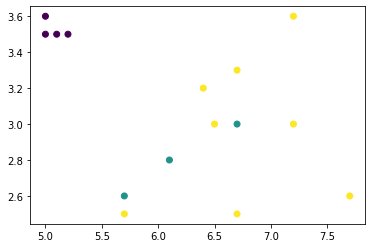

In [ ]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=knn.predict(x_test))

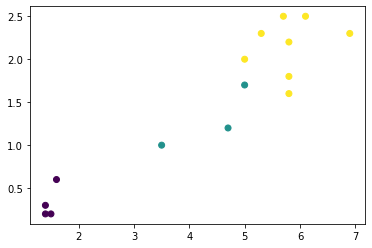

In [ ]:
plt.scatter(x_test[:, 2], x_test[:, 3], c=knn.predict(x_test))

Bài 7: Bạn hãy lựa chọn 1 tập dữ liệu phù hợp với bài toán hồi quy tuyến tính và xây dựng mô
hình hồi quy tuyến tính theo từng bước (kèm với mô tả của từng bước)
- Bước 1: Tải dữ liệu
- Bước 2: Mô tả dữ liệu
- Bước 3: Phân chia train – test (tỉ lệ 70% -30%)
- Bước 4: Huấn luyện mô hình với train set (10-fold cross validation)
- Bước 5: Kiểm thử mô hình với test set
- Bước 6: Trình bày kết quả và nhận xét

In [ ]:
dt7 = pd.read_csv("https://quantdev.ssri.psu.edu/sites/qdev/files/apexpos.csv")
df7 = pd.DataFrame(dt7)
df7.drop("id", inplace=True, axis=1)
df7.sample(5)
#mối liên quan giữa sự tiếp xúc với phenylaline (PHE) trước khi sinh của thai nhi và trí thông minh của thời thơ ấu

,apexpos,fsiq7
169,0.0,98
89,5.5,117
127,11.4,58
218,14.7,35
216,23.1,55


In [ ]:
df7.describe()

,apexpos,fsiq7
count,314.000000,314.000000
mean,11.279299,74.646497
std,6.938768,24.122012
min,0.000000,31.000000
25%,5.325000,53.250000
50%,10.700000,76.000000
75%,16.800000,95.000000
max,24.900000,126.000000


Text(0, 0.5, 'Age 7 Full Scale IQ')

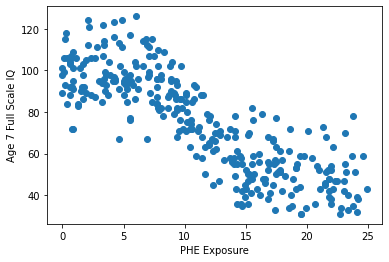

In [ ]:
plt.scatter(df7.apexpos, df7.fsiq7)
plt.xlabel("PHE Exposure")
plt.ylabel("Age 7 Full Scale IQ")

In [ ]:
data7_x = df7.apexpos.values
data7_y = df7.fsiq7.values

In [ ]:
dataset7 = np.concatenate((data7_x.reshape(-1, 1), data7_y.reshape(-1, 1)), axis=1)

In [ ]:
np.random.shuffle(dataset7)
sfdt7 = np.array_split(dataset7, 10)

In [ ]:
train7 = np.concatenate(sfdt7[:7])
test7 = np.concatenate(sfdt7[7:])
x_train_7 = train7[:, :1]
y_train_7 = train7[:, 1]
x_test_7 = test7[:, :1]
y_test_7 = test7[:, 1]

In [ ]:
x_train_7.shape, y_train_7.shape, x_test_7.shape, y_test_7.shape

((221, 1), (221,), (93, 1), (93,))

train score: 66.92740908531816 %
test score: 75.41553282860639 %


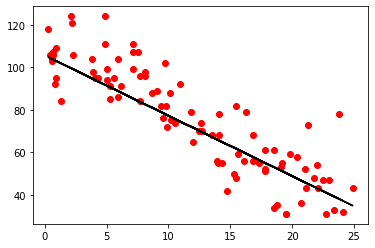

In [ ]:
from sklearn import linear_model

lnregr = linear_model.LinearRegression().fit(x_train_7, y_train_7)
y_pred_7 = lnregr.predict(x_test_7)
plt.scatter(x_test_7, y_test_7, color="red")
plt.plot(x_test_7, y_pred_7, color="black")
print("train score:", 100*lnregr.score(x_train_7, y_train_7), "%")
print("test score:", 100*lnregr.score(x_test_7, y_test_7), "%")

In [ ]:
y_test_7[15]

118.0

In [ ]:
y_pred_7[15]

104.75117778481767

In [ ]:
np.sqrt(mean_squared_error(y_test_7, y_pred_7))

12.435811282943812

Bài 8: Bạn hãy lựa chọn 1 tập dữ liệu phù hợp với bài toán hồi quy phi tuyến và xây dựng mô
hình hồi quy phi tuyến theo từng bước (kèm với mô tả của từng bước)
- Bước 1: Tải dữ liệu
- Bước 2: Mô tả dữ liệu
- Bước 3: Phân chia train – test (tỉ lệ 70% -30%)
- Bước 4: Huấn luyện mô hình với train set (10-fold cross validation)
- Bước 5: Kiểm thử mô hình với test set
- Bước 6: Trình bày kết quả và nhận xét

In [ ]:
csv8 = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv")
df8 = pd.DataFrame(csv8)
df8.sample(5)

In [ ]:
df8.Value.describe()

count    5.500000e+01
mean     1.437042e+12
std      2.500085e+12
min      4.668518e+10
25%      1.395123e+11
50%      3.074796e+11
75%      1.268748e+12
max      1.035483e+13
Name: Value, dtype: float64

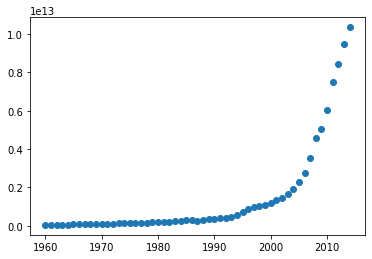

In [ ]:
data8_x = df8.Year.values
data8_y = df8.Value.values
# data8_x=data8_x/max(data8_x)
# data8_y=data8_y/max(data8_y)
plt.scatter(data8_x, data8_y)

In [ ]:
dataset8 = np.concatenate((data8_x.reshape(-1, 1), data8_y.reshape(-1, 1)), axis=1)

In [ ]:
np.random.shuffle(dataset8)
sfdt8 = np.array_split(dataset8, 10)

In [ ]:
train8 = np.concatenate(sfdt8[:7])
test8 = np.concatenate(sfdt8[7:])
x_train_8 = train8[:, :1]
y_train_8 = train8[:, 1]
x_test_8 = test8[:, :1]
y_test_8 = test8[:, 1]

In [ ]:
x_train_8 = x_train_8/max(x_train_8)
y_train_8 = y_train_8/max(y_train_8)
x_test_8 = x_test_8/max(x_test_8)
y_test_8 = y_test_8/max(y_test_8)

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_train_8.reshape(-1), y_train_8)
popt

array([709.73918237,   0.99715722])

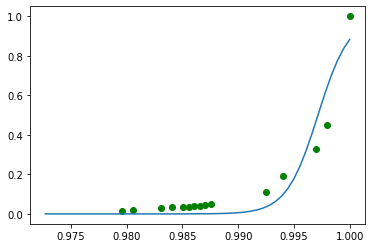

In [ ]:
x = np.linspace(1960, 2015)
x = x/max(x)
y = sigmoid(x, *popt)
plt.scatter(x_test_8, y_test_8, color="green")
plt.plot(x, y)

In [ ]:
y_pred_8 = sigmoid(x_test_8, *popt)
np.sqrt(mean_squared_error(y_test_8, y_pred_8))

0.08241624157443518

Bài 9: Bạn hãy lựa chọn 1 tập dữ liệu phù hợp với bài toán hồi quy logistic và xây dựng mô hình
hồi quy logistic theo từng bước (kèm với mô tả của từng bước)
- Bước 1: Tải dữ liệu
- Bước 2: Mô tả dữ liệu
- Bước 3: Phân chia train – test (tỉ lệ 70% -30%)
- Bước 4: Huấn luyện mô hình với train set (10-fold cross validation)
- Bước 5: Kiểm thử mô hình với test set
- Bước 6: Trình bày kết quả và nhận xét

Sử dụng dataset iris ở trên và chia theo tỷ lệ 70-30%

In [ ]:
train3 = np.concatenate(sfdt[:7])
test3 = np.concatenate(sfdt[7:])
x_train_3 = train3[:, :4]
y_train_3 = train3[:, 4]
x_test_3 = test3[:, :4]
y_test_3 = test3[:, 4]

In [ ]:
x_train_3.shape, y_train_3.shape, x_test_3.shape, y_test_3.shape

((105, 4), (105,), (45, 4), (45,))

In [ ]:
loreg = linear_model.LogisticRegression().fit(x_train_3, y_train_3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print("train score:", 100*loreg.score(x_train_3, y_train_3), "%")
print("test score:", 100*loreg.score(x_test_3, y_test_3), "%")

train score: 97.14285714285714 %
test score: 93.33333333333333 %


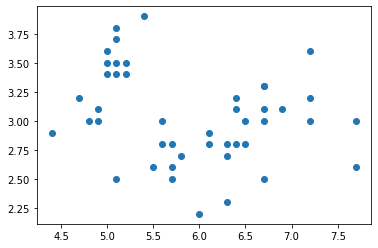

In [ ]:
plt.scatter(x_test_3[:, 0], x_test_3[:, 1])

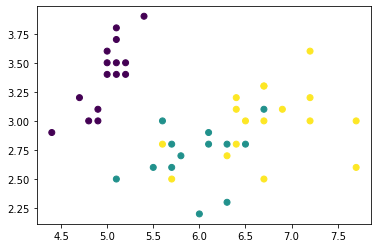

In [ ]:
plt.scatter(x_test_3[:, 0], x_test_3[:, 1], c=loreg.predict(x_test_3))

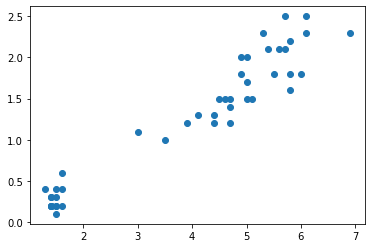

In [ ]:
plt.scatter(x_test_3[:, 2], x_test_3[:, 3])

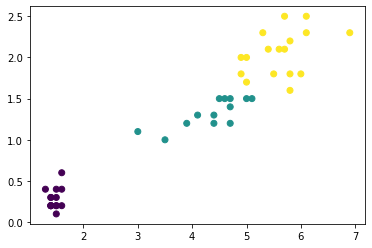

In [ ]:
plt.scatter(x_test_3[:, 2], x_test_3[:, 3], c=loreg.predict(x_test_3))

In [ ]:
y_test_3[15]

0.0

In [ ]:
y_pred_3 = loreg.predict(x_test_3)
y_pred_3[15]

0.0

In [ ]:
np.sqrt(mean_squared_error(y_test_3, y_pred_3))

0.2581988897471611